<a href="https://colab.research.google.com/github/Inddeed/EDA-and-Cleaning-with-Python/blob/main/Python_Intermediate_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. Importing Libraries and Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.stats import shapiro, skew

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importing our main dataset
potter_url = 'https://drive.google.com/file/d/1x0l6CPmzdA-0UnMMwR7ErF58YbPPVeYP/view?usp=sharing'

potter = 'https://drive.google.com/uc?id='+ potter_url.split('/')[-2]

df = pd.read_csv(potter)

In [ ]:
#Importing our RFM cluster predefined segment map
rfm_map_url = 'https://drive.google.com/file/d/1Gy1SRTV81y4C0BzBulsWyoBKtj_Hgeau/view?usp=sharing'

rfm_map = 'https://drive.google.com/uc?id='+ rfm_map_url.split('/')[-2]
df_rfm_map = pd.read_csv(rfm_map)

df_rfm_map['rfm_score'] = df_rfm_map['rfm_score'].astype(str)

# **1. Data Cleaning**

### **1.1 Converting Datatypes**

In [ ]:
df.shape

(12559, 11)

In [ ]:
df.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91.0,0,25000.0,1,25000.0,26,5,1996-11-03
1,100000038,X,A,69.0,0,9000.0,5,10000.0,25,10,1971-04-24
2,100000382,X,A,123.0,1,17330.0,6,20000.0,18,6,1953-01-16
3,100000612,X,A,84.0,1,25830.0,6,25000.0,14,7,1997-06-07
4,100000757,X,A,40.0,0,25000.0,3,25000.0,17,5,1989-09-13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12559 entries, 0 to 12558
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               12559 non-null  int64  
 1   account_activity_level   12559 non-null  object 
 2   customer_value_level     12559 non-null  object 
 3   MOB                      12559 non-null  float64
 4   flag_female              12559 non-null  int64  
 5   avg_sales_L36M           11820 non-null  float64
 6   cnt_sales_L36M           12559 non-null  int64  
 7   last_sales               12559 non-null  float64
 8   month_since_last_sales   12559 non-null  int64  
 9   count_direct_promo_L12M  12559 non-null  int64  
 10  birth_date               12559 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


Based on the data info it is found that column **account_id**, **MOB** and **birth_date** are not in sync with the data dictionary and can hinder further analysis. Lets change it to the following datatype.

action_id to String\
MOB to Integer\
birth_date to datetime

In [ ]:
df['account_id'] = df['account_id'].astype(str)
df['MOB'] = df['MOB'].astype(int)
df['birth_date'] = pd.to_datetime(df['birth_date'], format = '%Y-%m-%d')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12559 entries, 0 to 12558
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12559 non-null  object        
 1   account_activity_level   12559 non-null  object        
 2   customer_value_level     12559 non-null  object        
 3   MOB                      12559 non-null  int64         
 4   flag_female              12559 non-null  int64         
 5   avg_sales_L36M           11820 non-null  float64       
 6   cnt_sales_L36M           12559 non-null  int64         
 7   last_sales               12559 non-null  float64       
 8   month_since_last_sales   12559 non-null  int64         
 9   count_direct_promo_L12M  12559 non-null  int64         
 10  birth_date               12559 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 1.1+ MB


All set. Next lets find for typos or out of the bound unique value in the dataset

### **1.2 Treat Typos in Unique Value**

In [ ]:


for i in df.select_dtypes(exclude = 'number'):
  print(df[i].value_counts())
  print('\n')

account_id
100443808    2
101018108    2
100743650    2
100449544    2
100056011    2
            ..
100344129    1
100344145    1
100344200    1
100344250    1
101060006    1
Name: count, Length: 12487, dtype: int64


account_activity_level
X      8238
Z      3442
Y       878
XYZ       1
Name: count, dtype: int64


customer_value_level
E    4480
B    2390
A    2204
C    2003
D    1481
F       1
Name: count, dtype: int64


birth_date
1955-04-03    8
1957-01-15    7
1954-02-01    7
1952-12-27    6
1949-10-16    6
             ..
1986-01-28    1
1952-11-04    1
1990-07-25    1
1980-08-11    1
1975-08-21    1
Name: count, Length: 8702, dtype: int64




It is found that **account_activity_level** and **customer_value_level** column has strange value of XYZ and F which is out of bound of the data dictionary criteria. Lets check for any interesting pattern before we treat the datapoints.

In [ ]:
df.head(3)

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16


In [ ]:
df.groupby(['account_activity_level']).agg({'month_since_last_sales':['min','max','mean'],\
                                            'MOB':['min','max','mean'],\
                                            'avg_sales_L36M':['min','max','mean'],\
                                            'cnt_sales_L36M':['min','max','mean']})

month_since_last_sales                MOB       \
                                          min max       mean min  max   
account_activity_level                                                  
X                                           3  63  20.387109  15  571   
XYZ                                        53  53  53.000000  53   53   
Y                                           4  62  20.423690  15  232   
Z                                           3  61  21.698431  15  125   

                                  avg_sales_L36M                          \
                             mean            min       max          mean   
account_activity_level                                                     
X                       81.410172            0.0  200000.0  13661.411434   
XYZ                     53.000000            NaN       NaN           NaN   
Y                       61.470387            0.0   33000.0  15533.072215   
Z                       22.945671            0.0   25000.0  18562.349226   

                       cnt_sales_L36M                
                                  min max      mean  
account_activity_level                               
X                                   0  15  3.291818  
XYZ                                 0   0  0.000000  
Y                                   0  12  2.338269  
Z                                   0   9  1.226612

There is no clear pattern how we can assign this XYZ data point. It is recommended that we should ask the source data owner for clarification. For now we may remove the datapoint. Lets move on the next one

In [ ]:
df.groupby(['customer_value_level']).agg({'month_since_last_sales':['min','max','mean'],\
                                            'MOB':['min','max','mean'],\
                                            'avg_sales_L36M':['min','max','mean'],\
                                            'cnt_sales_L36M':['min','max','mean']})

month_since_last_sales                 MOB       \
                                        min max       mean  min  max   
customer_value_level                                                   
A                                         3  63  20.602541   15  229   
B                                         3  62  21.027197   15  134   
C                                         3  63  20.675986   15  143   
D                                         4  62  21.222147   15  154   
E                                         3  62  20.555580   15  571   
F                                        24  24  24.000000  122  122   

                                 avg_sales_L36M                          \
                            mean            min       max          mean   
customer_value_level                                                      
A                      60.314428            0.0  200000.0  16271.416907   
B                      60.979498            0.0   40000.0  15687.123656   
C                      64.282077            0.0   30500.0  14710.677607   
D                      63.883862            0.0   33000.0  15388.033261   
E                      67.297991            0.0   50000.0  14306.031184   
F                     122.000000        10000.0   10000.0  10000.000000   

                     cnt_sales_L36M                
                                min max      mean  
customer_value_level                               
A                                 0  14  2.549456  
B                                 0  13  2.512134  
C                                 0  12  2.694458  
D                                 0  15  2.604997  
E                                 0  15  2.793304  
F                                 1   1  1.000000

There is no clear pattern why this datapoint is out of place. It is recommended that we should ask the source data owner for clarification. For now we may remove the datapoint. Lets remove both datapoint.

In [ ]:
df = df[df['account_activity_level'] != 'XYZ']
df = df[df['customer_value_level'] != 'F']

In [ ]:
for i in df.select_dtypes(exclude = 'number'):
  print(df[i].value_counts())
  print('\n')

account_id
100266339    2
100335754    2
100669869    2
100046628    2
100499457    2
            ..
100344145    1
100344200    1
100344250    1
100344285    1
101060006    1
Name: count, Length: 12485, dtype: int64


account_activity_level
X    8238
Z    3442
Y     877
Name: count, dtype: int64


customer_value_level
E    4480
B    2390
A    2204
C    2003
D    1480
Name: count, dtype: int64


birth_date
1955-04-03    8
1954-02-01    7
1957-01-15    7
1952-12-27    6
1957-11-23    6
             ..
1968-03-26    1
1986-01-28    1
1952-11-04    1
1990-07-25    1
1975-08-21    1
Name: count, Length: 8700, dtype: int64




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12557 entries, 0 to 12558
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12557 non-null  object        
 1   account_activity_level   12557 non-null  object        
 2   customer_value_level     12557 non-null  object        
 3   MOB                      12557 non-null  int64         
 4   flag_female              12557 non-null  int64         
 5   avg_sales_L36M           11819 non-null  float64       
 6   cnt_sales_L36M           12557 non-null  int64         
 7   last_sales               12557 non-null  float64       
 8   month_since_last_sales   12557 non-null  int64         
 9   count_direct_promo_L12M  12557 non-null  int64         
 10  birth_date               12557 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 1.1+ MB


All set. Now lets check for and treat duplicate value

### **1.3 Treat Duplicates**

In [ ]:
df.duplicated().sum() #To check how many duplicated value across all columns

72

In [ ]:
df = df.drop_duplicates(keep = 'first') #To treat duplicate value across all columns

In [ ]:
print(df.duplicated().sum())
print(df.duplicated(subset='account_id').sum())

0
0


After treating duplicate value we found that there are no more duplicated datapoints across all columns. Also there are no duplicate value in **account_id** column indicating a clean and unique identifier of the dataset, maintaining the dataset integrity. Now lets check for missing value.

### **1.4 Treat Missing Values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12485 entries, 0 to 12558
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12485 non-null  object        
 1   account_activity_level   12485 non-null  object        
 2   customer_value_level     12485 non-null  object        
 3   MOB                      12485 non-null  int64         
 4   flag_female              12485 non-null  int64         
 5   avg_sales_L36M           11750 non-null  float64       
 6   cnt_sales_L36M           12485 non-null  int64         
 7   last_sales               12485 non-null  float64       
 8   month_since_last_sales   12485 non-null  int64         
 9   count_direct_promo_L12M  12485 non-null  int64         
 10  birth_date               12485 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 1.1+ MB


Column **avg_sales_L36M** has lower data points than the whole datapoints indicating blank value. Lets find for any interesting pattern before treating it.

In [ ]:
df['avg_sales_L36M'].isna().sum() #Checking for the amount of datapoints are null in avg_sales_L36M column

735

In [ ]:
df[df['avg_sales_L36M'].isnull()].describe()

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
count,735.000000,735.000000,0.0,735.0,735.000000,735.000000,735.000000,735
mean,72.055782,0.526531,NaN,0.0,15210.884354,54.631293,3.312925,1969-04-06 11:49:13.469387756
min,39.000000,0.000000,NaN,0.0,0.000000,39.000000,0.000000,1946-01-01 00:00:00
25%,53.000000,0.000000,NaN,0.0,15000.000000,52.000000,3.000000,1955-04-25 00:00:00
50%,59.000000,1.000000,NaN,0.0,15000.000000,54.000000,3.000000,1968-12-19 00:00:00
75%,87.000000,1.000000,NaN,0.0,15000.000000,59.000000,4.000000,1982-01-27 00:00:00
max,134.000000,1.000000,NaN,0.0,25000.000000,63.000000,7.000000,2007-07-17 00:00:00
std,25.400356,0.499636,NaN,0.0,952.776614,4.430062,1.076139,NaN


Notice how all of the datapoints that have blank **avg_sales_L36M** values all have **0** for the **cnt_sales_L36M** column. The missing value may indicates there are no sales occuring since there are no transactions happening for the last 36 Months. Although it is recommended that we should ask the source data owner for clarification, for now we may impute all the blank value with zeros.

In [ ]:
df['avg_sales_L36M'] = df['avg_sales_L36M'].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12485 entries, 0 to 12558
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12485 non-null  object        
 1   account_activity_level   12485 non-null  object        
 2   customer_value_level     12485 non-null  object        
 3   MOB                      12485 non-null  int64         
 4   flag_female              12485 non-null  int64         
 5   avg_sales_L36M           12485 non-null  float64       
 6   cnt_sales_L36M           12485 non-null  int64         
 7   last_sales               12485 non-null  float64       
 8   month_since_last_sales   12485 non-null  int64         
 9   count_direct_promo_L12M  12485 non-null  int64         
 10  birth_date               12485 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 1.1+ MB


All set! Lets move on the next task

### **1.5 Task: Calculate each Client Age as of May 31, 2023**

For analysis, remove any client with age less than 21

In [ ]:
df['client_age'] = round((datetime(year=2023, month=5, day=1) - df['birth_date']).dt.days / 365.22)

In [ ]:
df.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26.0
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,52.0
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70.0
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,26.0
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,34.0


In [ ]:
df[df['client_age'] < 21].shape[0]

128

There are 128 datapoints with the age of < 21, lets remove them for analysis purposes

In [ ]:
df = df[df['client_age'] >= 21]

In [ ]:
df.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26.0
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,52.0
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70.0
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,26.0
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,34.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12357 entries, 0 to 12558
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12357 non-null  object        
 1   account_activity_level   12357 non-null  object        
 2   customer_value_level     12357 non-null  object        
 3   MOB                      12357 non-null  int64         
 4   flag_female              12357 non-null  int64         
 5   avg_sales_L36M           12357 non-null  float64       
 6   cnt_sales_L36M           12357 non-null  int64         
 7   last_sales               12357 non-null  float64       
 8   month_since_last_sales   12357 non-null  int64         
 9   count_direct_promo_L12M  12357 non-null  int64         
 10  birth_date               12357 non-null  datetime64[ns]
 11  client_age               12357 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int

# **2. Exploratory Data Analysis**

### **2.1 Calculate the Total Sales in the Last 3 Years**

Let's make a new column called "total_sales" which calculated each account average sales in the last 36 months to each account total count of transaction in the last 36 months

In [ ]:
df['total_sales'] = df['cnt_sales_L36M'] * df['avg_sales_L36M']

In [ ]:
df['total_sales'].describe()

,total_sales
count,12357.000000
mean,32581.035850
std,21155.815114
min,0.000000
25%,20000.000000
50%,28000.000000
75%,42000.000000
max,244400.000000


* From the description above it is found that the mean of total sales in the last 3 years is 32,581 euros
* The total sales standard deviation is 21,115.82 euros
* Minimum value of 0 indicating there are customers with no sales at all for the last 3 years
* Maximum a customer spent in the last 3 years is 244,400 euros

<Axes: xlabel='total_sales', ylabel='Count'>

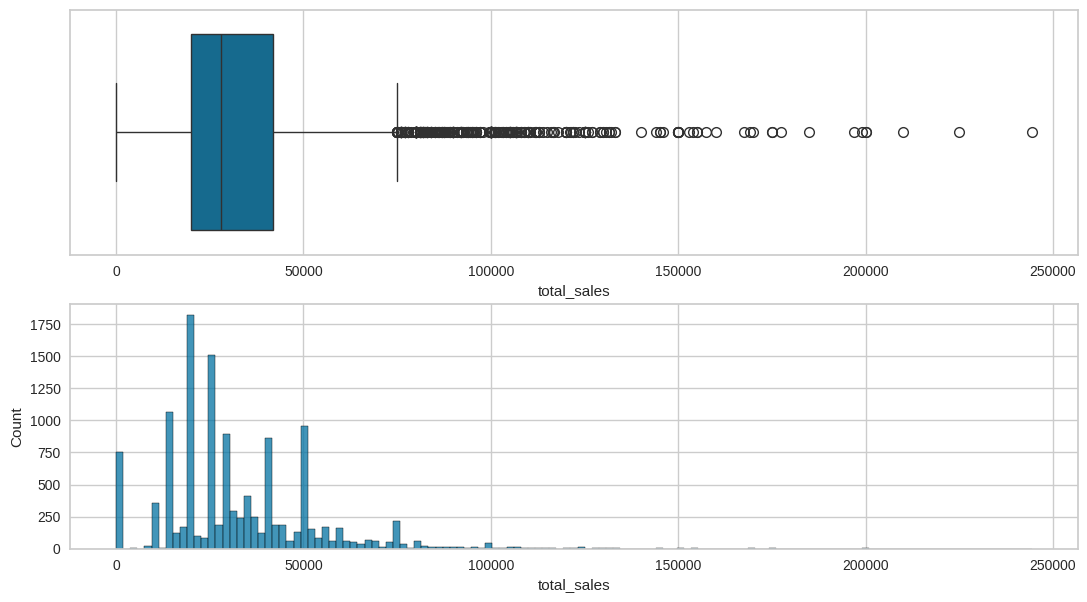

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (13,7))

sns.boxplot(df['total_sales'], orient='h', ax = ax[0])
sns.histplot(df['total_sales'], ax = ax[1])

* The boxplot and histplot above indicating that the data distribution is highly right-skewed and there are multiple outliers in the data set

### **2.2 Identify Clients with No Sales in the Last 3 Years**

Let's start with flagging client with 0 sales in the last 3 years. We may want to create a new column to store this flags.

In [ ]:
def flag_sales(sales):
  if sales == 0:
    return "No Sales"
  else:
    return "Sales"

df['sales_flag_L36M'] = df['total_sales'].apply(flag_sales)

In [ ]:
df.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age,total_sales,sales_flag_L36M
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26.0,25000.0,Sales
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,52.0,45000.0,Sales
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70.0,103980.0,Sales
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,26.0,154980.0,Sales
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,34.0,75000.0,Sales


In [ ]:
df_sales_flag = df['sales_flag_L36M'].value_counts().reset_index()
df_sales_flag

,sales_flag_L36M,count
0,Sales,11606
1,No Sales,751


* It is found that there are 751 account with no sales in the last 3 years.

Text(0.5, 1.0, 'Client by Sales in the Last 3 Years')

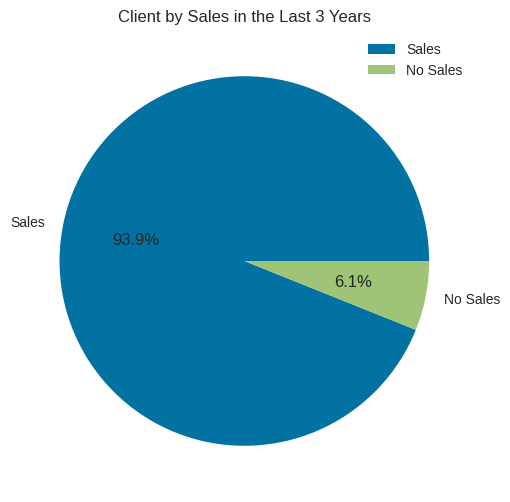

In [ ]:
plt.subplots(figsize = (13,6))

plt.pie(df_sales_flag['count'],
        labels = df_sales_flag['sales_flag_L36M'],
        autopct='%.1f%%');

plt.legend()
plt.title("Client by Sales in the Last 3 Years")

* As shown in the graph above, it is concluded that there are about 6.1% of customer which represent the 751 client with no sales in the last 3 years

### **2.3 Account Activity Level Transactions Activity**

Let's create an aggregate calculation of account_activity_level column based on the median of **month_since_last_sales** column and the mean of **cnt_sales_L36M** column

In [ ]:
df_acc_activity = df.groupby(df['account_activity_level']).agg({'month_since_last_sales':'median',
                                                                'cnt_sales_L36M':'mean'}).reset_index()

df_acc_activity

,account_activity_level,month_since_last_sales,cnt_sales_L36M
0,X,18.0,3.284143
1,Y,18.0,2.339471
2,Z,19.0,1.228142


Text(0, 0.5, 'Account Activity Level')

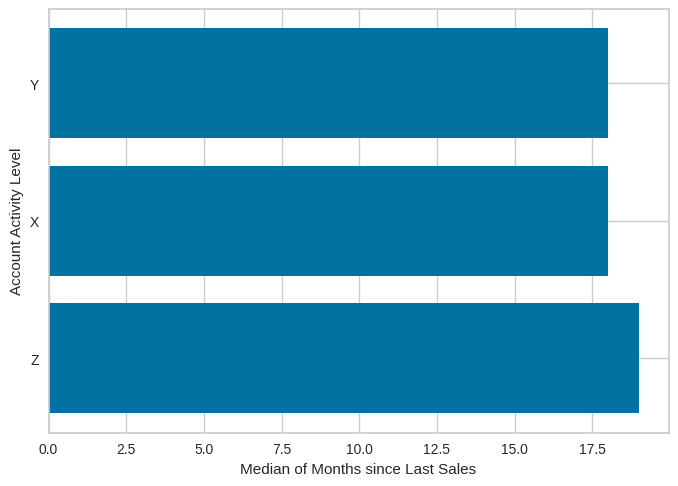

In [ ]:
plt.barh(df_acc_activity.sort_values('month_since_last_sales', ascending=False)['account_activity_level'],
         df_acc_activity.sort_values('month_since_last_sales', ascending=False)['month_since_last_sales'])

plt.xlabel('Median of Months since Last Sales')
plt.ylabel('Account Activity Level')

* From the median of the last sales perspective, With the Y account activity level, the X category has the most recent last sales month, which indicate a more recent client sales activity. Although the difference is minimum compared to the three categories.

Text(0, 0.5, 'Account Activity Level')

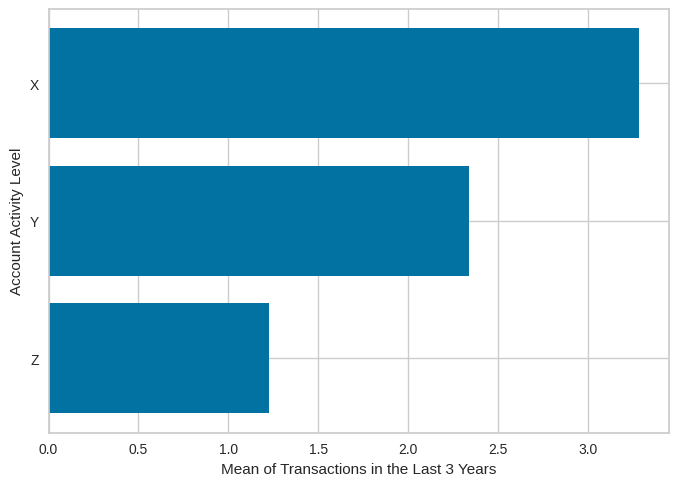

In [ ]:
plt.barh(df_acc_activity.sort_values('cnt_sales_L36M', ascending=True)['account_activity_level'],
         df_acc_activity.sort_values('cnt_sales_L36M', ascending=True)['cnt_sales_L36M'])

plt.xlabel('Mean of Transactions in the Last 3 Years')
plt.ylabel('Account Activity Level')

* The mean of transactions in last 3 years shows a more apparent difference for the 3 level of categories with the X category has the highest mean of number of transaction followed by the Y category with the Z category at last.

### **2.4 Client Profits by Gender**

As stated in the company profile, we know that for each 100 euros earned in total sales, the company will receive 2.4 euros in profit. To calculate for profit for each gender we need to aggregate total sales for each gender then multiply it by 2.4%

In [ ]:
df['total_profit'] = df['total_sales']*0.024

In [ ]:
df.groupby(df['flag_female']).agg({'total_profit':'sum'})

,total_profit
flag_female,
0,4475328.00
1,5187164.64


For 1 being the category that the customer is female, we can see in a glance that female customer in general generate more profit than male customer

Male customer skewness:1.7362172142982255
Female customer skewness:1.6766728700353526


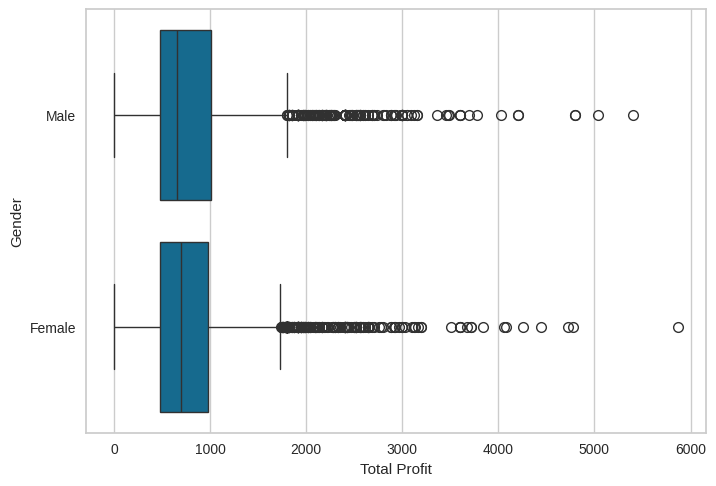

In [ ]:
sns.boxplot(df, y = df['flag_female'].map({0:'Male',1:'Female'}),
            x = 'total_profit', orient = 'h')

plt.xlabel('Total Profit')
plt.ylabel('Gender')

Male = df[df['flag_female'] == 0]
print('Male customer skewness:' + str(Male['total_profit'].skew()))

Female = df[df['flag_female'] == 1]
print('Female customer skewness:' + str(Female['total_profit'].skew()))

From the above boxplot we can see that both Female or Male customer have an almost the same distribution profile with a right skew profile. Male customer have a skewness of 1.73 and Female customer have lower skewness of 1.67

# **3. Insight & Recommendation**

### **3.1 Calculate the Proportion of Total Sales Based on Generations**

Let's starts with creating a new column representing generation based on birth year value. We can use the following criteria: \

Gen Z = 1997 - 2012\
Gen Y = 1981 - 1996\
Gen X = 1965 - 1980\
Baby Boomers = 1946 - 1964


In [ ]:
df['birth_year'] = df['birth_date'].dt.year

In [ ]:
def generation(year):
  if 1997 <= year <= 2012:
    return "Gen Z"
  elif 1981 <= year <= 1996:
    return "Gen Y"
  elif 1965 <= year <= 1980:
    return "Gen X"
  else:
    return "Baby Boomers"

df['generation'] = df['birth_year'].apply(generation)

In [ ]:
df.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age,total_sales,sales_flag_L36M,total_profit,birth_year,generation
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26.0,25000.0,Sales,600.00,1996,Gen Y
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,52.0,45000.0,Sales,1080.00,1971,Gen X
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70.0,103980.0,Sales,2495.52,1953,Baby Boomers
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,26.0,154980.0,Sales,3719.52,1997,Gen Z
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,34.0,75000.0,Sales,1800.00,1989,Gen Y


In [ ]:
df_generation = df.groupby('generation').agg({'total_sales':'sum','cnt_sales_L36M':'sum','avg_sales_L36M':'sum'}).reset_index()

df_generation

,generation,total_sales,cnt_sales_L36M,avg_sales_L36M
0,Baby Boomers,214504820.0,18519,87912930.0
1,Gen X,118989560.0,8908,55086410.0
2,Gen Y,64030320.0,4933,31089450.0
3,Gen Z,5079160.0,417,1947960.0


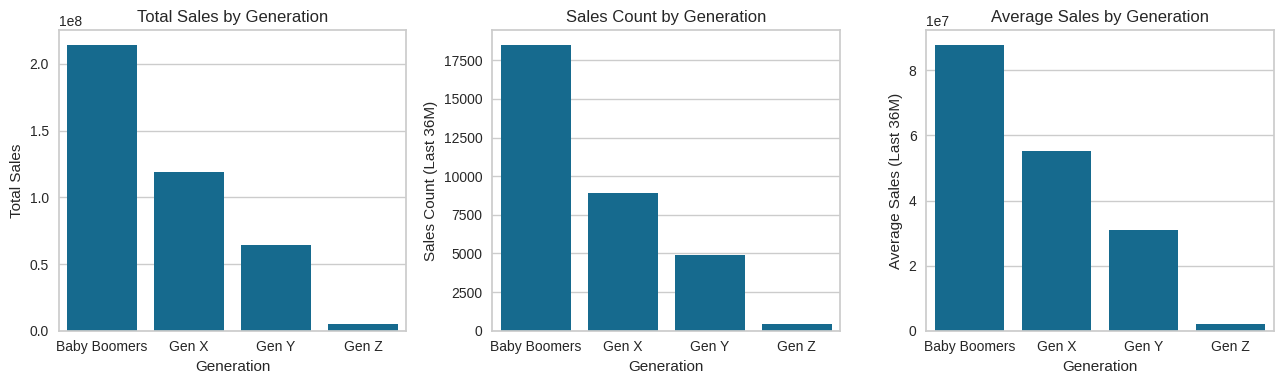

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(13,4))

custval = df['generation'].unique()

sns.barplot(df_generation, x = 'generation', y = 'total_sales', ax = ax[0])
sns.barplot(df_generation, x = 'generation', y = 'cnt_sales_L36M', ax = ax[1])
sns.barplot(df_generation, x = 'generation', y = 'avg_sales_L36M', ax = ax[2])

ax[0].set_xlabel("Generation")
ax[0].set_ylabel("Total Sales")
ax[0].set_title("Total Sales by Generation")

ax[1].set_xlabel("Generation")
ax[1].set_ylabel("Sales Count (Last 36M)")
ax[1].set_title("Sales Count by Generation")

ax[2].set_xlabel("Generation")
ax[2].set_ylabel("Average Sales (Last 36M)")
ax[2].set_title("Average Sales by Generation")

plt.tight_layout()
plt.show()

Insights:
* From above graph, Baby Boomers dominate for Total Sales, Sales Count and the Average sales in the last 3 years compared to other generation.
* The data shown that the company top revenue drivers are coming from the older generation first then gradually decreasing to younger generation

Recommendation:
* The company may want to focus on retaining and upscaling older customer to sustain high revenue driver and nurturing growth.
* The company may want to start on attracting younger customer. Develop product that fit younger generations, fit marketing campaign that appeal to younger generation, and/or increasing promotion on younger generation may benefit the company.

### **3.2 Calculate the Relationship between Count of Direct Promo & Total Sales**

In [ ]:
df.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age,total_sales,sales_flag_L36M,total_profit,birth_year,generation
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26.0,25000.0,Sales,600.00,1996,Gen Y
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,52.0,45000.0,Sales,1080.00,1971,Gen X
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70.0,103980.0,Sales,2495.52,1953,Baby Boomers
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,26.0,154980.0,Sales,3719.52,1997,Gen Z
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,34.0,75000.0,Sales,1800.00,1989,Gen Y


Text(0, 0.5, 'Total Sales')

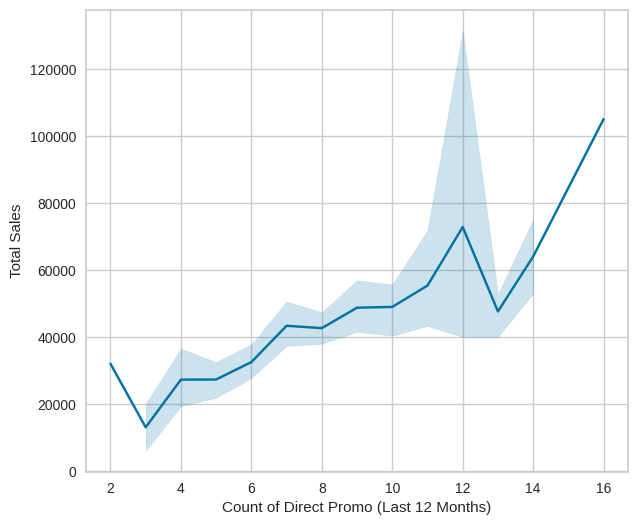

In [ ]:
plt.figure(figsize = (7,6))

sns.lineplot(df[df['month_since_last_sales'] <= 12], x='count_direct_promo_L12M', y='total_sales')
plt.xlabel('Count of Direct Promo (Last 12 Months)')
plt.ylabel('Total Sales')

Insights:
* In general, higher direct promo has a strong positive correlation to total sales with tight variation for up to 9 direct promo
* Although higher direct promo equates to higher total sales, higher than 9 direct promo causes the total sales to plateau and disperse variatively with higher number of direct promo, indicating an unstable return of total sales with higher than 9 direct promo.

In [ ]:
def interest(count):
  if 9 <= count <= 16:
    return 1
  else:
    return 0

df['flag_count_direct_promo'] = df['count_direct_promo_L12M'].apply(interest)

In [ ]:
df_high_direct_promo = df[(df['flag_count_direct_promo'] == 1) & (df['month_since_last_sales'] <= 12)]

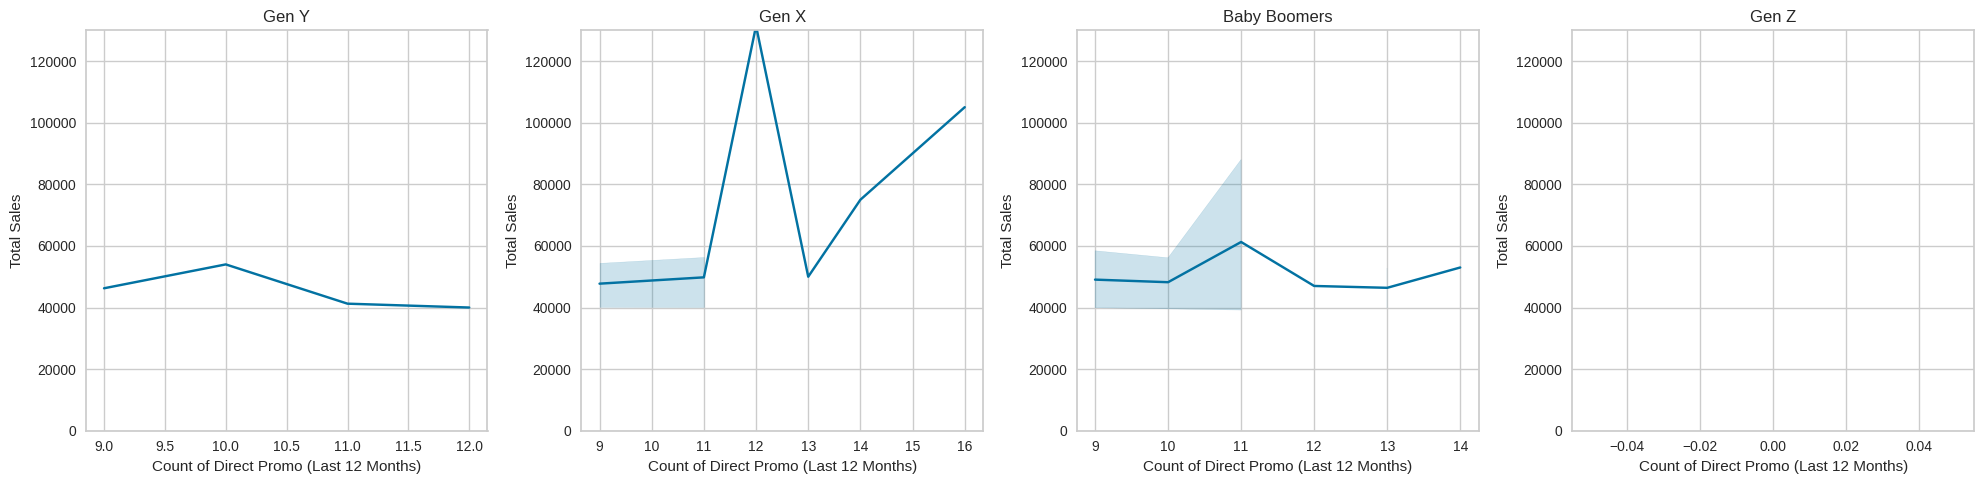

In [ ]:
custval = df['generation'].unique()

fig, ax = plt.subplots(1, 4, figsize = (20,5))

for i, val in enumerate(custval):
  sns.lineplot(df_high_direct_promo[df_high_direct_promo['generation'] == val], x = 'count_direct_promo_L12M', y = 'total_sales', ax = ax[i])
  ax[i].set_xlabel('Count of Direct Promo (Last 12 Months)')
  ax[i].set_ylabel("Total Sales")
  ax[i].set_title(val)
  ax[i].set_ylim(0,130000)

plt.tight_layout()
plt.show()

Insights:
* Focusing on each generation, it is indicative that higher than 9 direct promo on Baby Boomers and Gen Y resulted in a stagnant sales while there are no promo higher than 9 is aimed at Gen Z. Interestingly, Gen X react positively with higher direct promo.

Recommendation:
* From generation perspective, the company may want to reevaluate campaign strategies or the decision to send higher than 9 direct promo to Baby Boomers and Gen Y, as these generation do not react as strongly as what happen on Gen X
* As an effort to increase low total sales from young generation, the company may need to increase number direct promo to Gen Zs

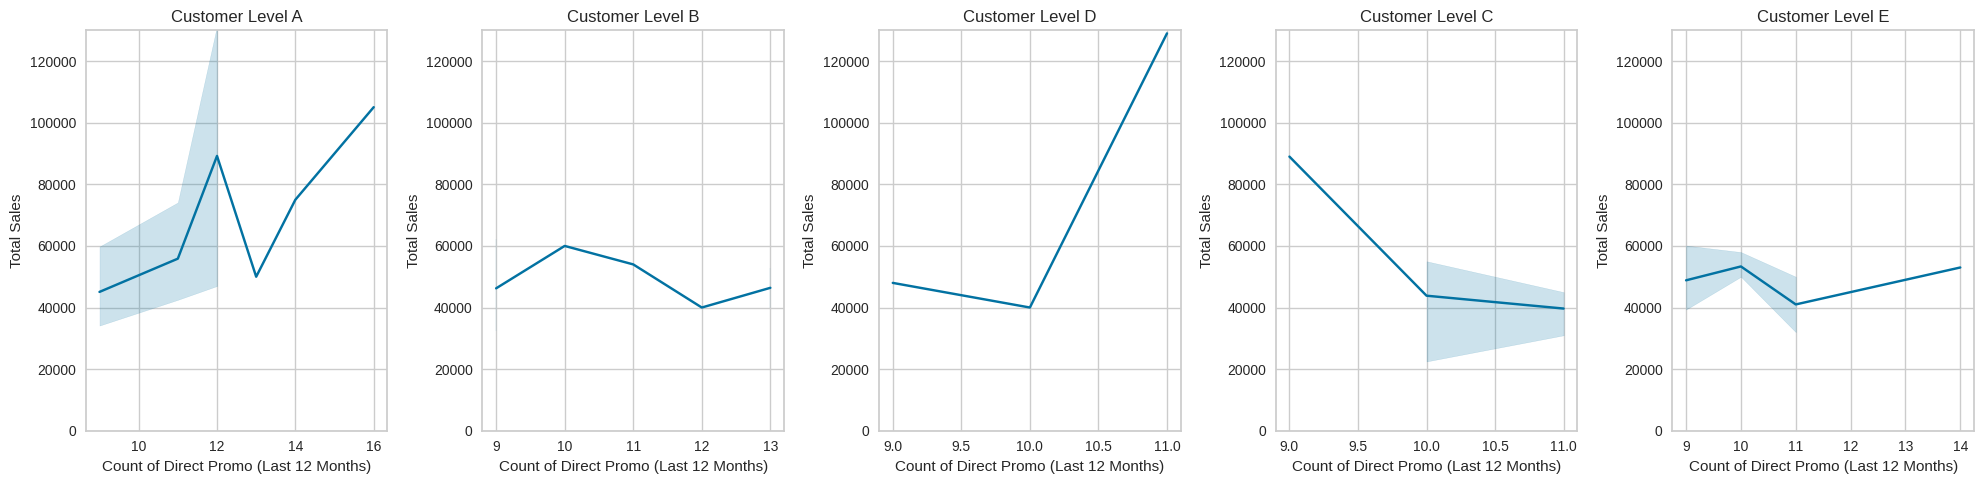

In [ ]:
fig, ax = plt.subplots(1,5 , figsize = (20,5))

custval = df['customer_value_level'].unique()

ax = ax.flatten()

for i, val in enumerate(custval):
  sns.lineplot(df_high_direct_promo[df_high_direct_promo['customer_value_level'] == val], x='count_direct_promo_L12M', y = 'total_sales', ax = ax[i])
  ax[i].set_xlabel('Count of Direct Promo (Last 12 Months)')
  ax[i].set_ylabel("Total Sales")
  ax[i].set_title('Customer Level ' +str(val))
  ax[i].set_ylim(0,130000)

plt.tight_layout()

Insights:
* Examining on **customer_value_level**, it is shown that higher than 9 direct promo may increase total sales for customer level A and D. On the other hand, higher than 9 direct promo on customer level B and E resulted in a stagnant total sales while it is resulted in fewer total sales on customer level C.

Recommendation:
* The company can evaluate for a better direct promotion strategies or stop sending higher than 9 direct promo specifically for customer level B, C, and E as these customer levels do not react positively with higher than 9 direct promo.

# **4. Clustering & Segmentation**

### **4.1 Apply Clustering Method**

#### **4.1.1 K-Means Method**

K-Means clustering is an unsupervised machine learning algorithm that offers a flexible clustering method that cluster number of features into groups which may presents a unique and may never been before seen cluster that can help companies in setting appropriate strategies.

The unsupervised nature of K-Means Clustering may offer RevoBank to see unseen opportunities that can be leveraged easily to encourage its existing customers to use its credit card products more.



##### **4.1.1.1 Feature Selection & Removing Outlier**

Aligning with the goal in encouraging existing customer to use RevoBank credit product more and to create customers persona, we can consider the following features for clustering:
* **client_age**: Younger customers might have different spending behaviors than older ones.
* **avg_sales_L36M**: Higher spenders might represent customer income level and impulsiveness
* **cnt_sales_L36M**: Higher transaction frequency indicates how often the company product is being used.
* **month_since_last_sales**: A more recent transaction activity may indicates the customers are still utilizing our product

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12357 entries, 0 to 12356
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12357 non-null  object        
 1   account_activity_level   12357 non-null  object        
 2   customer_value_level     12357 non-null  object        
 3   MOB                      12357 non-null  int64         
 4   flag_female              12357 non-null  int64         
 5   avg_sales_L36M           12357 non-null  float64       
 6   cnt_sales_L36M           12357 non-null  int64         
 7   last_sales               12357 non-null  float64       
 8   month_since_last_sales   12357 non-null  int64         
 9   count_direct_promo_L12M  12357 non-null  int64         
 10  birth_date               12357 non-null  datetime64[ns]
 11  client_age               12357 non-null  float64       
 12  total_sales              12357 n

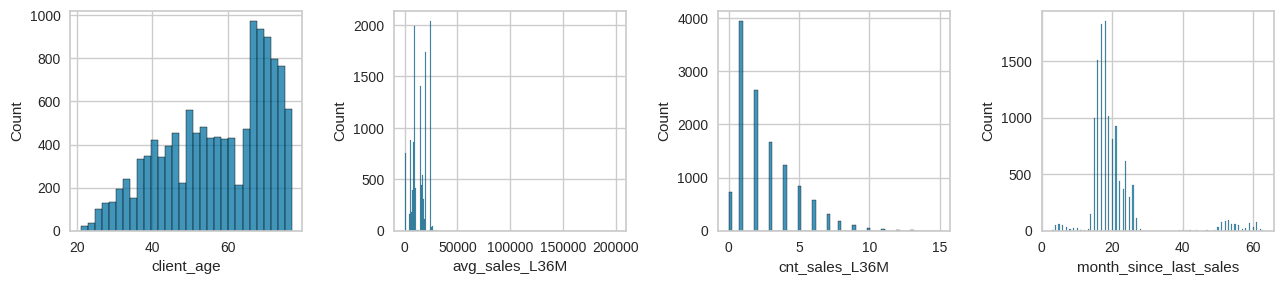

In [ ]:
custval = ['client_age', 'avg_sales_L36M', 'cnt_sales_L36M', 'month_since_last_sales']

fig, ax = plt.subplots(1, 4, figsize=(13,3))

for i, val in enumerate(custval):
  sns.histplot(df[val], ax=ax[i])

plt.tight_layout()

As shown in the graph above, avg_sales_L36M, cnt_sales_L36M, and month_since_last_sales_L36M are highly skewd we may want to remove those outliers first before moving on. For client_age, it doesnt seems to be as skewed as the other group we may want to preserve it for now to see any interesting pattern in that feature

In [ ]:
df_no_outliers = df.copy()

custval = ['avg_sales_L36M', 'cnt_sales_L36M', 'month_since_last_sales']

for i in custval:
  Q1 = df_no_outliers[i].quantile(0.25)
  Q3 = df_no_outliers[i].quantile(0.75)
  IQR = Q3 - Q1
  df_no_outliers = df_no_outliers[~((df_no_outliers[i] < (Q1 - 1.5 * IQR)) | (df_no_outliers[i] > (Q3 + 1.5 * IQR)))]

In [ ]:
df_k = df_no_outliers[['client_age', 'avg_sales_L36M', 'cnt_sales_L36M', 'month_since_last_sales']]

In [ ]:
df_k.head()

,client_age,avg_sales_L36M,cnt_sales_L36M,month_since_last_sales
0,26.0,25000.0,1,26
1,52.0,9000.0,5,25
2,70.0,17330.0,6,18
3,26.0,25830.0,6,14
4,34.0,25000.0,3,17


In [ ]:
df_k.shape

(11137, 4)

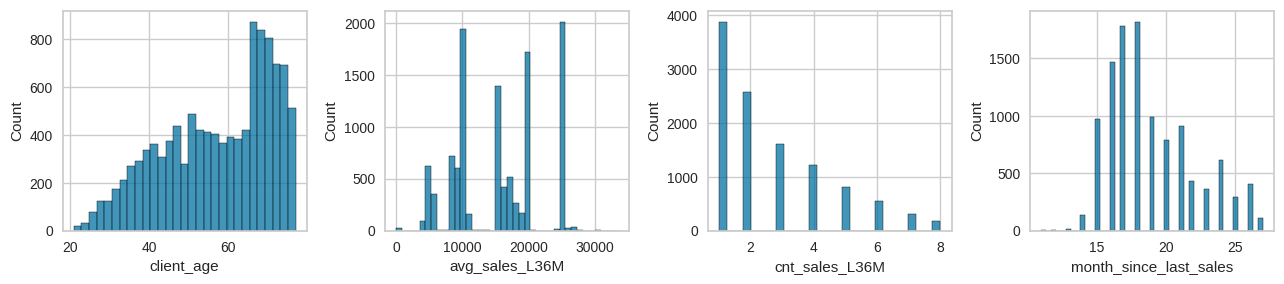

In [ ]:
custval = ['client_age', 'avg_sales_L36M', 'cnt_sales_L36M', 'month_since_last_sales']

fig, ax = plt.subplots(1, 4, figsize=(13,3))

for i, val in enumerate(custval):
  sns.histplot(df_k[val], ax=ax[i])

plt.tight_layout()

##### **4.1.1.2 Features Scaling**

In [ ]:
def determine_scaler(data, column_name):
    # Perform Shapiro-Wilk test for normality and calculate skewness
    stat, p_value = shapiro(data[column_name])
    skewness = skew(data[column_name])

    # Print results for debugging
    print(f"{column_name} - Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}")
    print(f"{column_name} - Skewness: {skewness}")

    # Determine which scaler to use
    if p_value > 0.05 and -1 <= skewness <= 1:
        scaler = "StandardScaler"
    elif p_value < 0.05 and -1 <= skewness <= 1:
        scaler = "MinMaxScaler"
    elif p_value < 0.05 and (skewness < -1 or skewness > 1):
        scaler = "RobustScaler"
    else:
        scaler = "RobustScaler"

    return scaler

# Example usage with the dataframe 'df_segmentation'
client_age_scaler = determine_scaler(df_k, 'client_age')
avg_sales_L36M_scaler = determine_scaler(df_k, 'avg_sales_L36M')
cnt_sales_L36M_scaler = determine_scaler(df_k, 'cnt_sales_L36M')
month_since_last_sales_scaler = determine_scaler(df_k, 'month_since_last_sales')
# MOB_scaler = determine_scaler(df_k, 'MOB')

print(f"Recommended Scaler for client_age: {client_age_scaler}")
print(f"Recommended Scaler for avg_sales_L36M: {avg_sales_L36M_scaler}")
print(f"Recommended Scaler for cnt_sales_L36M: {cnt_sales_L36M_scaler}")
print(f"Recommended Scaler for month_since_last_sales: {month_since_last_sales_scaler}")
# print(f"Recommended Scaler for MOB: {MOB_scaler}")

client_age - Shapiro-Wilk Test: Statistic=0.940723531991643, p-value=1.309418917386592e-54
client_age - Skewness: -0.47048810680743347
avg_sales_L36M - Shapiro-Wilk Test: Statistic=0.9255092050099634, p-value=7.673551292923893e-59
avg_sales_L36M - Skewness: 0.08411880350148528
cnt_sales_L36M - Shapiro-Wilk Test: Statistic=0.8428060462226873, p-value=8.226214514404944e-74
cnt_sales_L36M - Skewness: 1.052092993218337
month_since_last_sales - Shapiro-Wilk Test: Statistic=0.9281226940322839, p-value=3.6084294086700924e-58
month_since_last_sales - Skewness: 0.7336604928694777
Recommended Scaler for client_age: MinMaxScaler
Recommended Scaler for avg_sales_L36M: MinMaxScaler
Recommended Scaler for cnt_sales_L36M: RobustScaler
Recommended Scaler for month_since_last_sales: MinMaxScaler


In [ ]:
mmscaler = MinMaxScaler()
df_k['client_age'] = mmscaler.fit_transform(df_k[['client_age']])
df_k['avg_sales_L36M'] = mmscaler.fit_transform(df_k[['avg_sales_L36M']])
df_k['month_since_last_sales'] = mmscaler.fit_transform(df_k[['month_since_last_sales']])

rsscaler = RobustScaler()
df_k['cnt_sales_L36M'] = rsscaler.fit_transform(df_k[['cnt_sales_L36M']])

In [ ]:
df_k.head()

,client_age,avg_sales_L36M,cnt_sales_L36M,month_since_last_sales
0,0.089286,0.746269,-0.333333,0.9375
1,0.553571,0.268657,1.000000,0.8750
2,0.875000,0.517313,1.333333,0.4375
3,0.089286,0.771045,1.333333,0.1875
4,0.232143,0.746269,0.333333,0.3750


##### **4.1.1.3 Determining Number of Clusters**

In [ ]:
distortions = []
K = range(1, 16)
for n_clusters in K:
  model = KMeans(n_clusters, random_state=1000, n_init='auto')
  model.fit(df_k)
  distortions.append(model.inertia_)

  print(f'For k = {n_clusters}, distortion = {model.inertia_}')

For k = 1, distortion = 5484.979348391826
For k = 2, distortion = 2427.741554860104
For k = 3, distortion = 1811.7080927521456
For k = 4, distortion = 1553.353852015247
For k = 5, distortion = 1342.2797551508356
For k = 6, distortion = 1236.7925722258276
For k = 7, distortion = 1114.0607566373071
For k = 8, distortion = 1033.6943433429358
For k = 9, distortion = 958.0366519241463
For k = 10, distortion = 919.1769692265823
For k = 11, distortion = 868.1445352397292
For k = 12, distortion = 828.8382193050772
For k = 13, distortion = 783.4168139037664
For k = 14, distortion = 748.5188535113338
For k = 15, distortion = 718.7124232220259


<Figure size 1600x800 with 0 Axes>

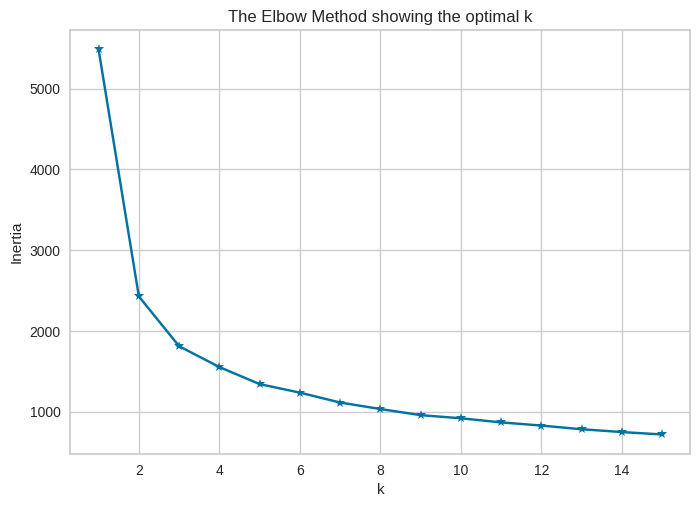

In [ ]:
plt.figure(figsize=(16, 8))
plt.figure()
plt.plot(K, distortions, 'b*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Using the elbow method, it may be can be determined that the elbow is located in K equals 2 to 5. Lets do further testing using the silhoute method next.

For k=2, the average silhouette score is 0.4967838278966856
For k=3, the average silhouette score is 0.36258389282523945
For k=4, the average silhouette score is 0.2850919381667224
For k=5, the average silhouette score is 0.26477008843408933
For k=6, the average silhouette score is 0.2552198037094932
For k=7, the average silhouette score is 0.26236811035215624
For k=8, the average silhouette score is 0.2581716747699301
For k=9, the average silhouette score is 0.26350498988730103
For k=10, the average silhouette score is 0.2550442717392115


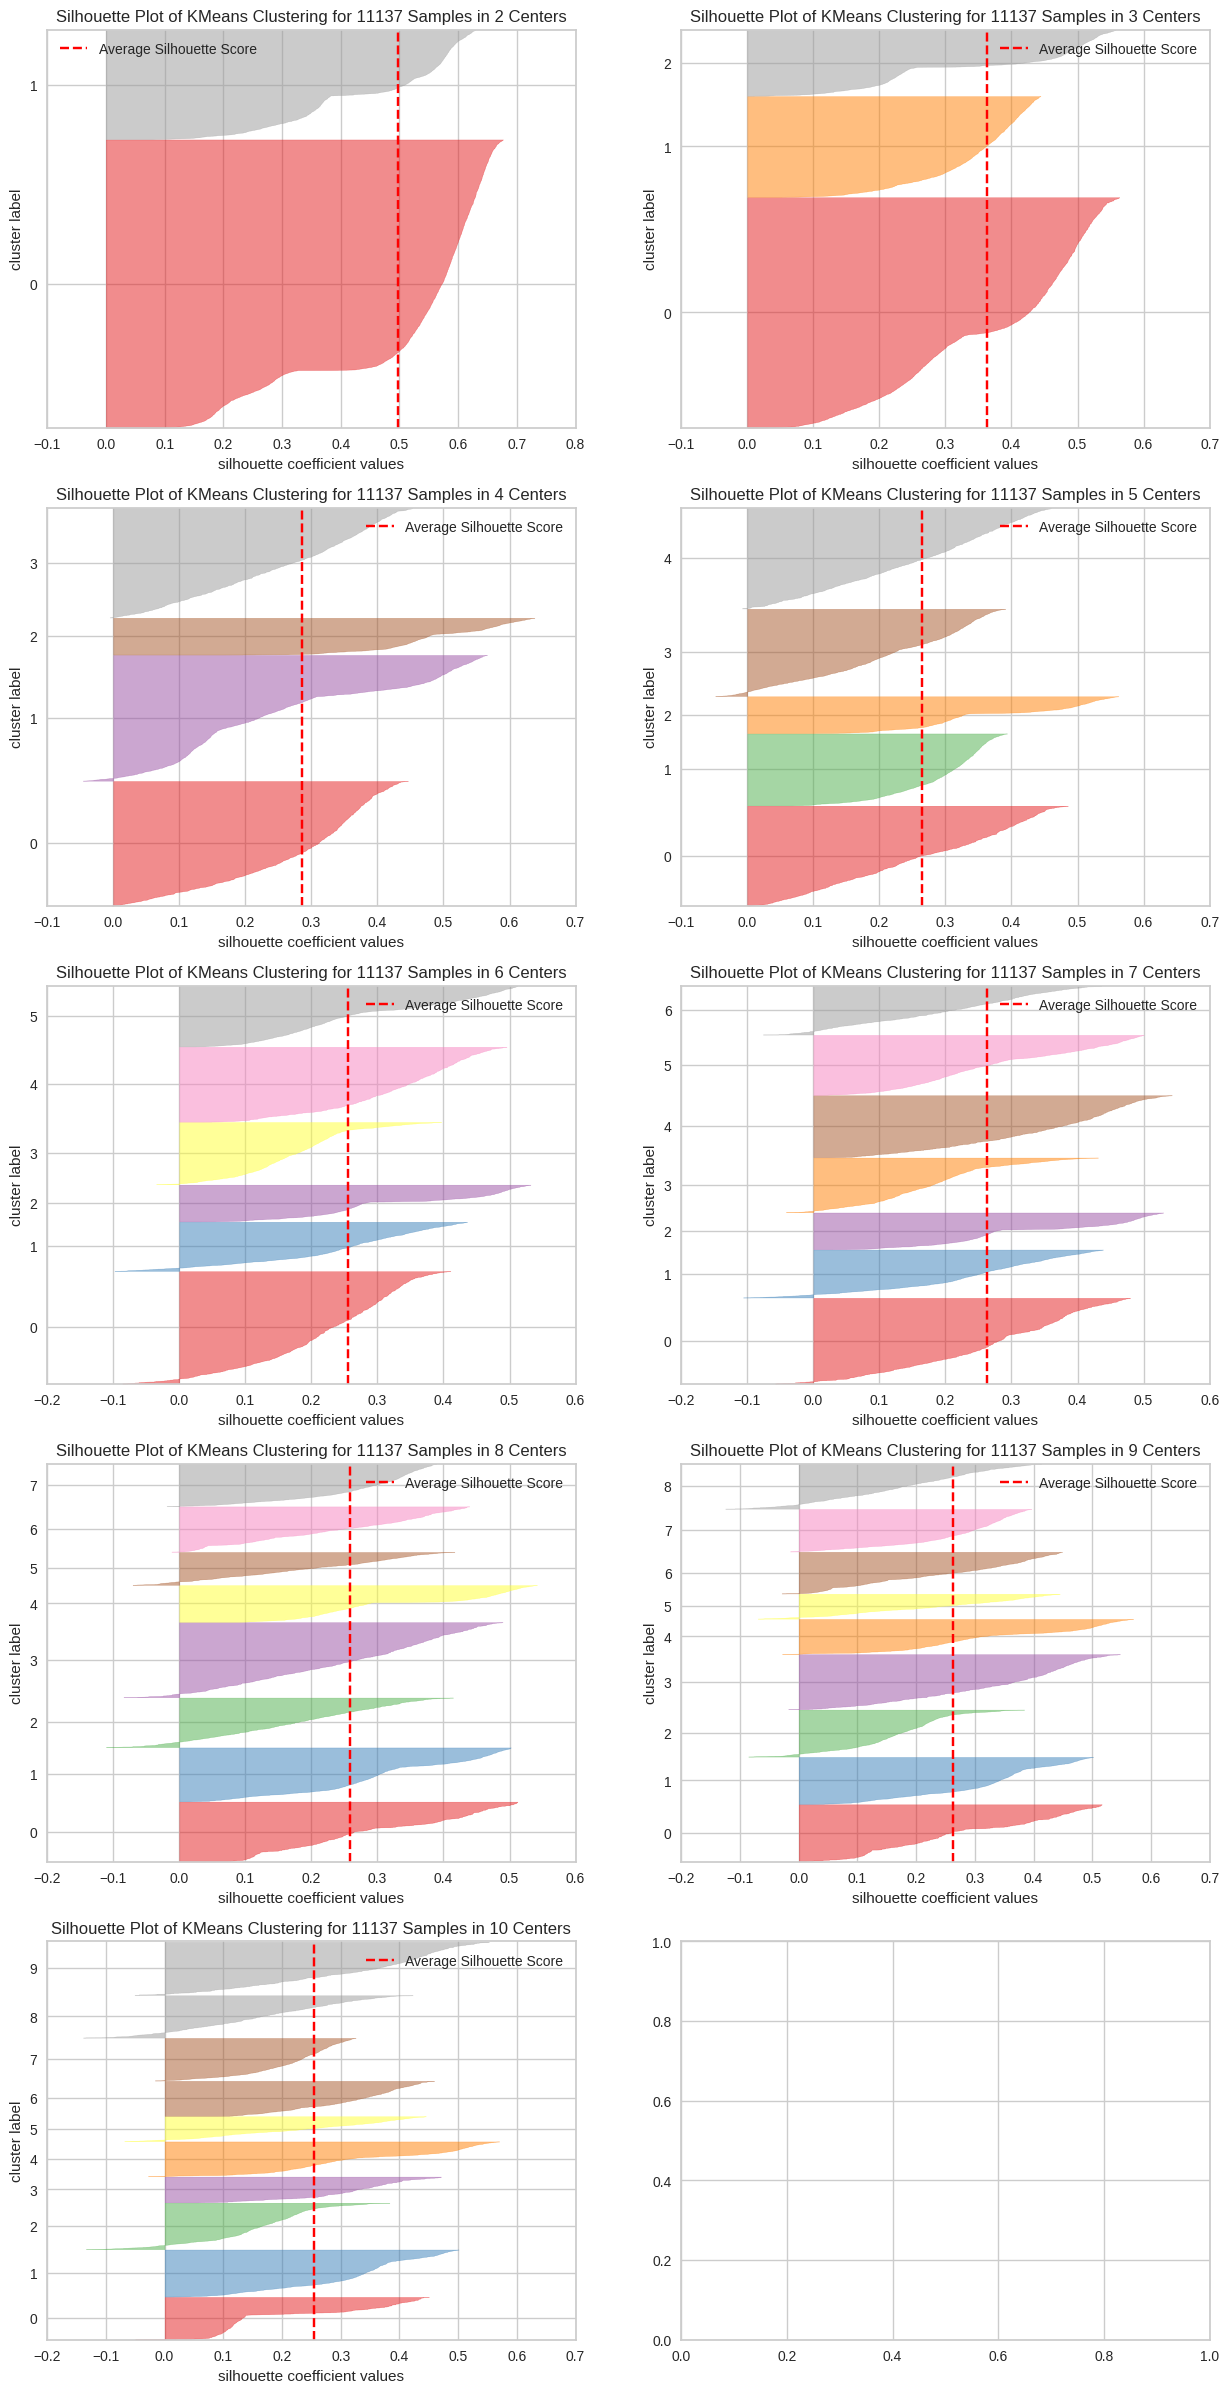

In [ ]:
# Silhouette score plot
K = range(2, 11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize=(15, 30))

for n_clusters in K:
  model = KMeans(n_clusters, random_state=1000, n_init='auto')
  model.fit(df_k)

  q, mod = divmod(n_clusters, 2)
  sil = SilhouetteVisualizer(model, is_fitted=True, ax=ax[q-1][mod])
  sil.fit(df_k)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

Using the silhouete method it is found that the cluster with the highest silhouete score is K=2 and K=3. Since we want to see interesting pattern other than high and low, we may want to look for higher K, which is K=3.

In [ ]:
# Create the final cluster model
kmeans = KMeans(n_clusters=3, random_state=1000, n_init='auto')
kmeans.fit(df_k)

df_k['clusters'] = kmeans.labels_
df_no_outliers['clusters'] = kmeans.labels_

In [ ]:
df_no_outliers.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,...,total_profit,birth_year,generation,flag_count_direct_promo,r_score,f_score,m_score,rfm_score,segment,clusters
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,...,600.00,1996,Gen Y,0,1,1,2,112,Lost,0
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,...,1080.00,1971,Gen X,1,1,5,4,154,Can’t Lose Them,2
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,...,2495.52,1953,Baby Boomers,0,4,5,5,455,Champions,2
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,...,3719.52,1997,Gen Z,0,5,5,5,555,Champions,2
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,...,1800.00,1989,Gen Y,0,4,3,5,435,Loyal Customers,1


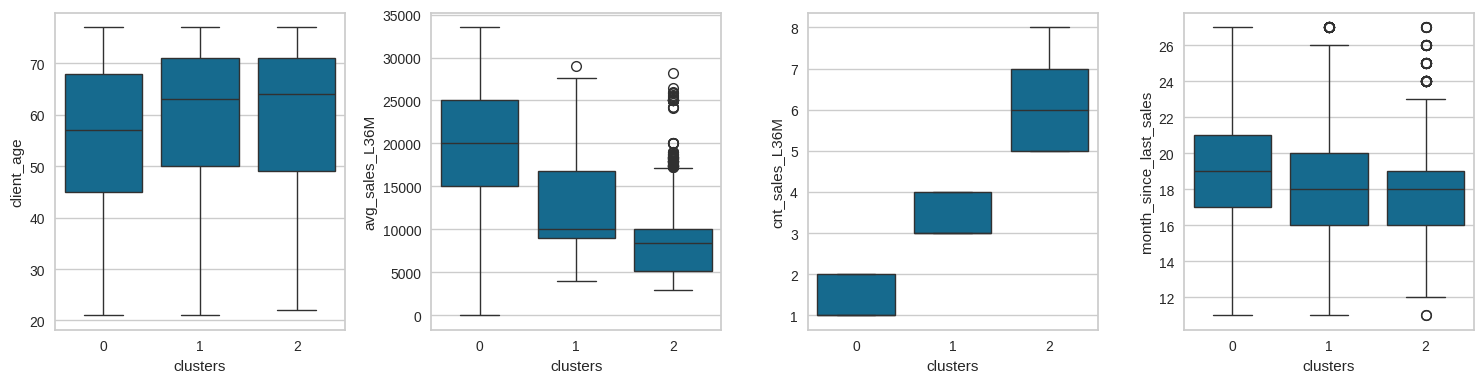

In [ ]:
custval = ['client_age', 'avg_sales_L36M', 'cnt_sales_L36M', 'month_since_last_sales']

fig, ax = plt.subplots(1, 4, figsize = (15, 4))

for i, val in enumerate(custval):
  sns.boxplot(df_no_outliers, y = val, x = 'clusters', ax = ax[i])

plt.tight_layout()

##### **4.1.1.4 Clusters Interpretation**

In [ ]:
df_no_outliers.groupby('clusters')[['client_age', 'avg_sales_L36M', 'cnt_sales_L36M', 'month_since_last_sales']].\
agg(['count','mean','min','max','median']).T

clusters                                  0             1             2
client_age             count    6466.000000   2828.000000   1843.000000
                       mean       56.026446     59.400990     59.027130
                       min        21.000000     21.000000     22.000000
                       max        77.000000     77.000000     77.000000
                       median     57.000000     63.000000     64.000000
avg_sales_L36M         count    6466.000000   2828.000000   1843.000000
                       mean    18433.911228  12624.801980   8457.124254
                       min         0.000000   4000.000000   3000.000000
                       max     33500.000000  29000.000000  28140.000000
                       median  20000.000000  10000.000000   8400.000000
cnt_sales_L36M         count    6466.000000   2828.000000   1843.000000
                       mean        1.399474      3.428925      5.914813
                       min         1.000000      3.000000      5.000000
                       max         2.000000      4.000000      8.000000
                       median      1.000000      3.000000      6.000000
month_since_last_sales count    6466.000000   2828.000000   1843.000000
                       mean       19.433344     18.479844     17.919154
                       min        11.000000     11.000000     11.000000
                       max        27.000000     27.000000     27.000000
                       median     19.000000     18.000000     18.000000

Interpretation:
* Cluster 2 represents group of customer which do frequent transaction and shows recent activity but are low spenders which shown as the lowest average sales compared to other clusters. This cluster may represent the oldest customer group although it may not much of different from Cluster 1.
* Cluster 1 represents group of customer with moderate transactions frequency, recency, and average spendings compared to the other groups
* Cluster 0 represents group of customer of high spenders but less often doing transactions and shwon to be least recent to do transaction. This group also represent the youngest customer group compared to other clusters.

<Axes: xlabel='clusters', ylabel='total_sales'>

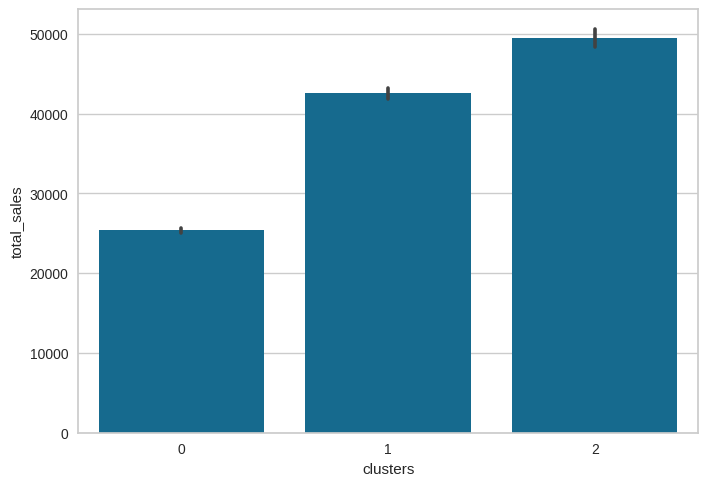

In [ ]:
sns.barplot(df_no_outliers, x = 'clusters', y = 'total_sales')

Interpretation:
* From total sales wise, it can be concluded that RevoBank are depending more on high frequency and low spenders (cluster 2 and 1) which dwarfed the high spenders, low transaction customer group

##### **4.1.1.5 Cluster Recommendation**

Recommendation:
* For Cluster 2, based on its high transaction frequency and low spendings, we may want to implement gamification to introduce rewards for crossing certain milestone (for example getting a bonus point for doing 10 transaction in a week). We can also gradually increase their credit limit based on consistent repayment behavior to encourage higher spending.
* For Cluster 1, based on its moderate frequency and spending, we may want to analyze these customer group spending patterns to offer personalized deals on categories they’re likely to spend more on. We may also want to implement a tiered rewards system that encourages higher spending to unlock better benefits.
* For Cluster 0, based on its high spending amount and infrequent transaction habit, we may want to offer exclusive rewards for luxury spending categories such as travel, dining, or high-end retail. Offer upgrades to higher-tier credit cards with enhanced benefits or personalized financial products like loans or investment advice may also beneficial in increasing this group performance. It may also recommended for RevoBank to grow this cluster group further as it is still below the other cluster in total sales wise.